In [15]:
#JAI MATA DI

In [16]:
!pip install moviepy'
!pip install librosa

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


# Importing The Packages

In [17]:
import os
import sys
import time
import json
import requests
import subprocess
import pandas as pd

In [18]:
import os
import pandas as pd

# Define the folder path
folder_path = 'Video_Speech_Actor_01'

# Define the mappings
modality_mapping = {'01': 'full-AV', '02': 'video-only', '03': 'audio-only'}
vocal_channel_mapping = {'01': 'speech', '02': 'song'}
emotion_mapping = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

# Initialize an empty list to store the data
data = []

# Iterate through the folders and files
for actor_folder in os.listdir(folder_path):
    actor_path = os.path.join(folder_path, actor_folder)
    if os.path.isdir(actor_path):
        for file_name in os.listdir(actor_path):
            if file_name.endswith('.mp4'):
                parts = file_name.split('-')
                modality = modality_mapping[parts[0]]
                vocal_channel = vocal_channel_mapping[parts[1]]
                emotion = emotion_mapping[parts[2]]
                intensity = 'normal' if parts[3] == '01' else 'strong'
                statement = 'Statement 01' if parts[4] == '01' else 'Statement 02'
                repetition = 'Repetition 01' if parts[5] == '01' else 'Repetition 02'
                actor = int(parts[6].split('.')[0])
                gender = 'male' if actor % 2 != 0 else 'female'
                
                # Append the data to the list
                data.append({
                    'File Name': file_name,
                    'Modality': modality,
                    'Vocal Channel': vocal_channel,
                    'Emotion': emotion,
                    'Intensity': intensity,
                    'Statement': statement,
                    'Repetition': repetition,
                    'Actor': actor,
                    'Gender': gender,
                    'File Path': os.path.join(actor_path, file_name)
                })

# Create a dataframe from the data
df = pd.DataFrame(data)
print(df)

                     File Name    Modality Vocal Channel    Emotion Intensity  \
0     01-01-01-01-01-01-01.mp4     full-AV        speech    neutral    normal   
1     01-01-01-01-01-02-01.mp4     full-AV        speech    neutral    normal   
2     01-01-01-01-02-01-01.mp4     full-AV        speech    neutral    normal   
3     01-01-01-01-02-02-01.mp4     full-AV        speech    neutral    normal   
4     01-01-02-01-01-01-01.mp4     full-AV        speech       calm    normal   
...                        ...         ...           ...        ...       ...   
2755  02-01-08-01-02-02-24.mp4  video-only        speech  surprised    normal   
2756  02-01-08-02-01-01-24.mp4  video-only        speech  surprised    strong   
2757  02-01-08-02-01-02-24.mp4  video-only        speech  surprised    strong   
2758  02-01-08-02-02-01-24.mp4  video-only        speech  surprised    strong   
2759  02-01-08-02-02-02-24.mp4  video-only        speech  surprised    strong   

         Statement     Repe

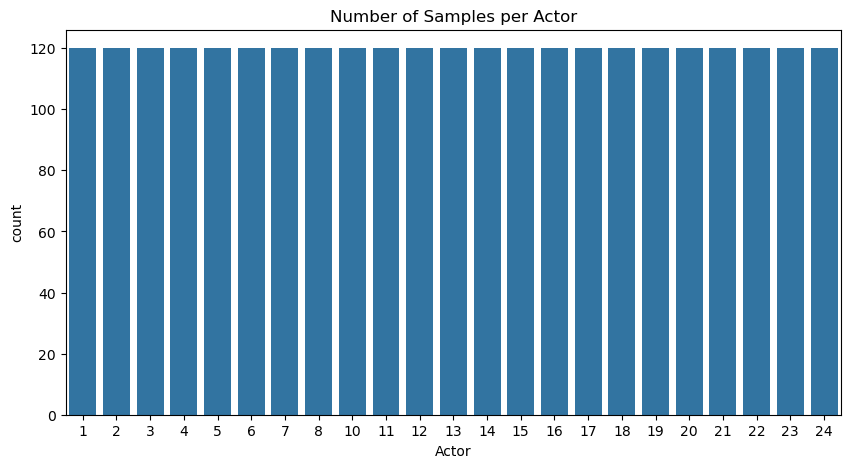

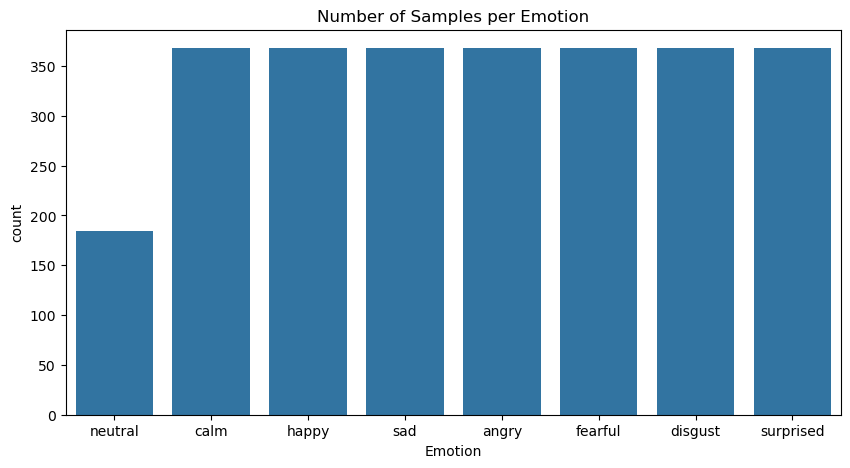

In [19]:
#visulaization of Datas based on Actor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='Actor', data=df)
plt.title('Number of Samples per Actor')
plt.show()

#visulaization of Datas based on Emotion
plt.figure(figsize=(10, 5))
sns.countplot(x='Emotion', data=df)
plt.title('Number of Samples per Emotion')
plt.show()


In [20]:
print(df.columns)

Index(['File Name', 'Modality', 'Vocal Channel', 'Emotion', 'Intensity',
       'Statement', 'Repetition', 'Actor', 'Gender', 'File Path'],
      dtype='object')


In [21]:
# Data Imbalance Checking 
df['Emotion'].value_counts()


Emotion
calm         368
happy        368
sad          368
angry        368
fearful      368
disgust      368
surprised    368
neutral      184
Name: count, dtype: int64

In [22]:


from moviepy import AudioFileClip
import numpy as np

# Function to load audio from .mp4
def load_audio_from_mp4(file_path):
    audio_clip = AudioFileClip(file_path)
    y = np.array(audio_clip.to_soundarray())
    sr = audio_clip.fps  # Sampling rate
    audio_clip.close()
    # Convert stereo to mono if needed
    if y.ndim > 1:
        y = y.mean(axis=1)
    return y, sr

Processing file: Video_Speech_Actor_01/Actor_14/01-01-05-02-01-02-14.mp4 | Emotion: angry | Gender: female


/tmp/ipykernel_143416/1498321328.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = filtered_df.groupby(['Emotion', 'Gender']).apply(lambda x: x.sample(1)).reset_index(drop=True)


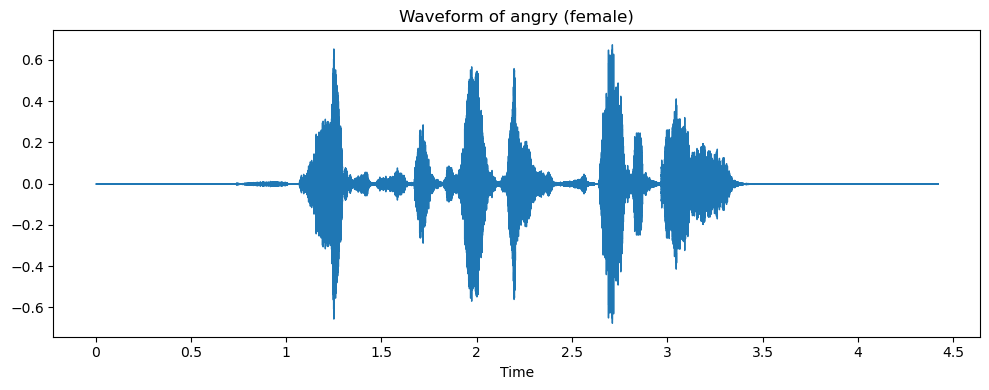

Processing file: Video_Speech_Actor_01/Actor_23/01-01-05-02-02-01-23.mp4 | Emotion: angry | Gender: male


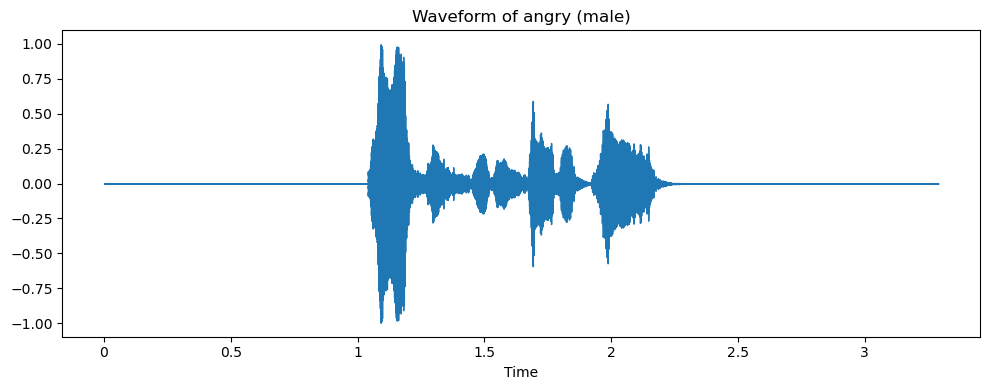

Processing file: Video_Speech_Actor_01/Actor_10/01-01-02-02-02-02-10.mp4 | Emotion: calm | Gender: female


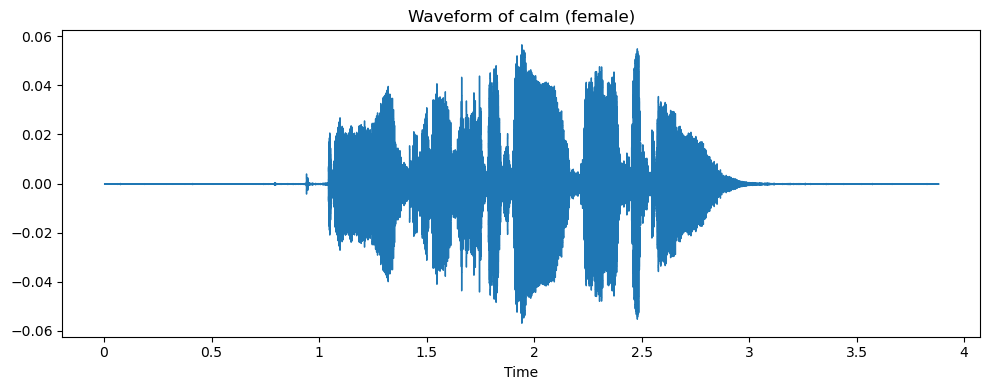

Processing file: Video_Speech_Actor_01/Actor_19/01-01-02-02-01-02-19.mp4 | Emotion: calm | Gender: male


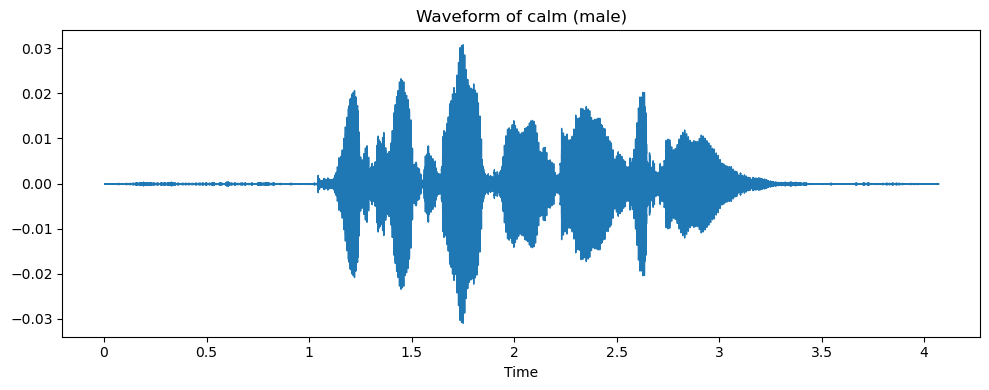

Processing file: Video_Speech_Actor_01/Actor_04/01-01-07-02-01-01-04.mp4 | Emotion: disgust | Gender: female


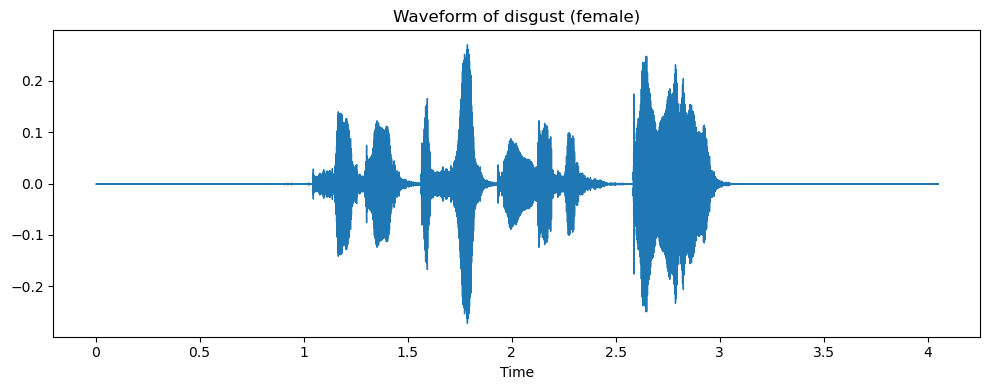

Processing file: Video_Speech_Actor_01/Actor_05/01-01-07-02-01-02-05.mp4 | Emotion: disgust | Gender: male


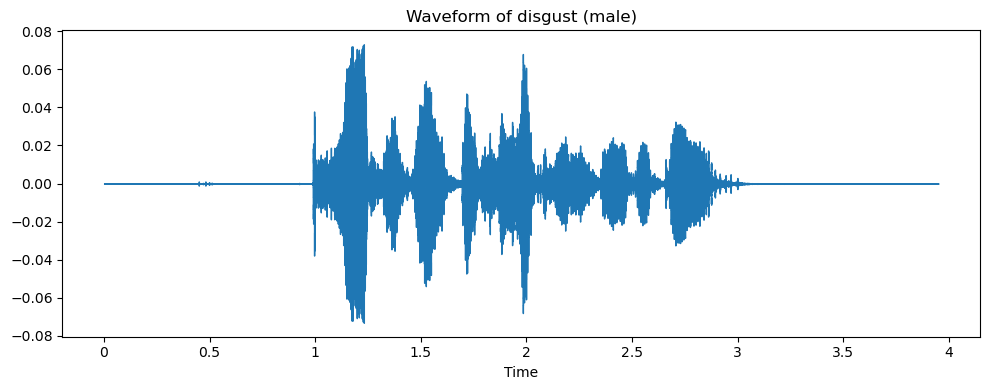

Processing file: Video_Speech_Actor_01/Actor_12/01-01-06-02-01-02-12.mp4 | Emotion: fearful | Gender: female


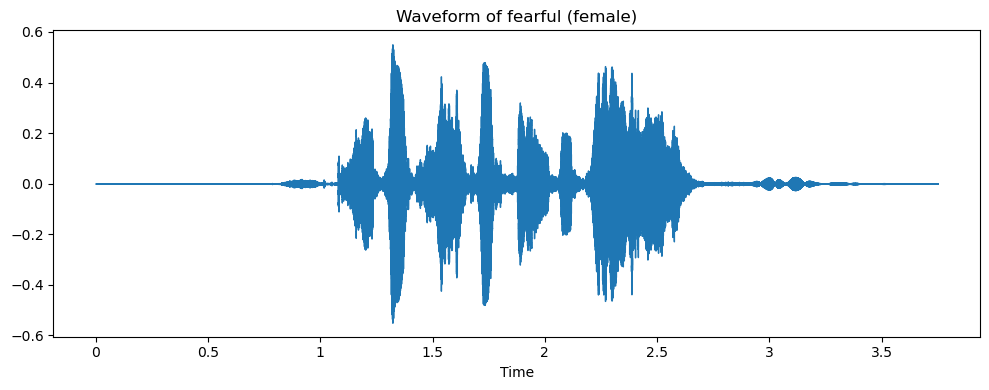

Processing file: Video_Speech_Actor_01/Actor_01/01-01-06-01-02-01-01.mp4 | Emotion: fearful | Gender: male


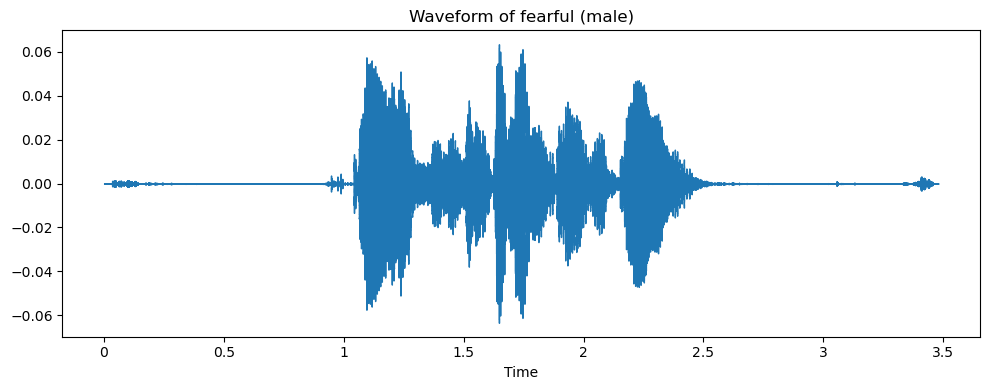

Processing file: Video_Speech_Actor_01/Actor_04/01-01-03-02-01-02-04.mp4 | Emotion: happy | Gender: female


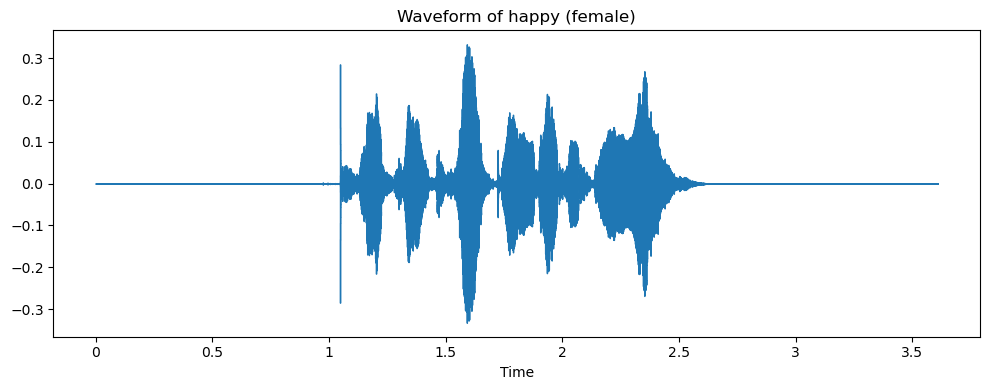

Processing file: Video_Speech_Actor_01/Actor_15/01-01-03-02-01-02-15.mp4 | Emotion: happy | Gender: male


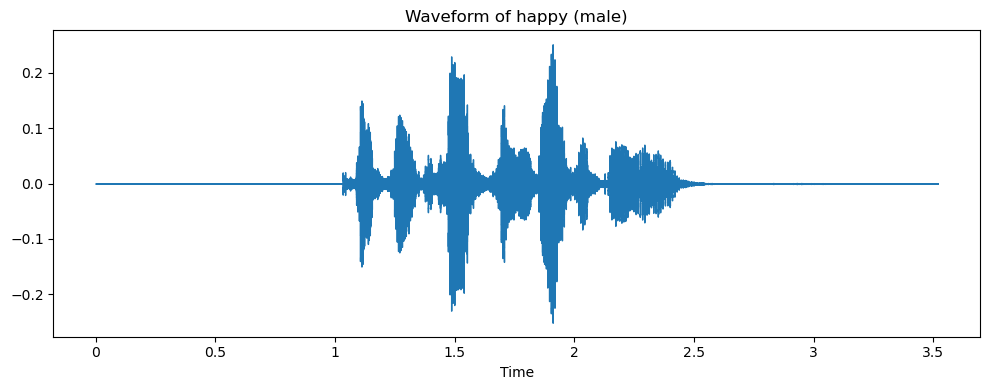

Processing file: Video_Speech_Actor_01/Actor_10/01-01-01-01-01-01-10.mp4 | Emotion: neutral | Gender: female


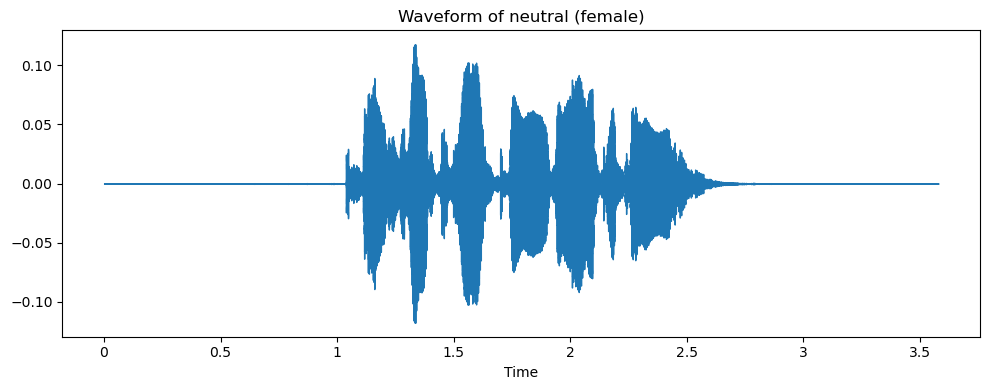

Processing file: Video_Speech_Actor_01/Actor_15/01-01-01-01-02-01-15.mp4 | Emotion: neutral | Gender: male


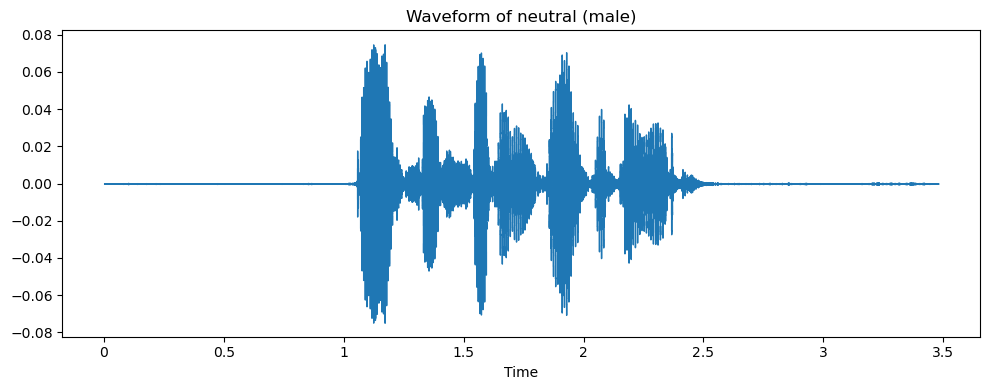

Processing file: Video_Speech_Actor_01/Actor_02/01-01-04-02-01-01-02.mp4 | Emotion: sad | Gender: female


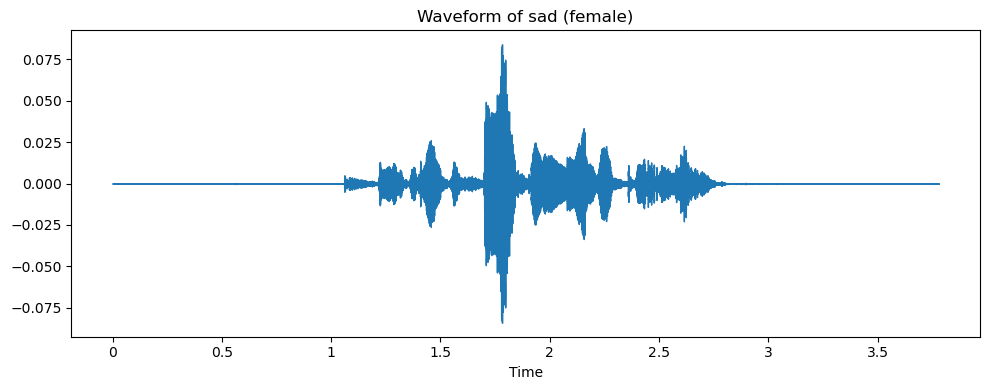

Processing file: Video_Speech_Actor_01/Actor_17/01-01-04-02-02-01-17.mp4 | Emotion: sad | Gender: male


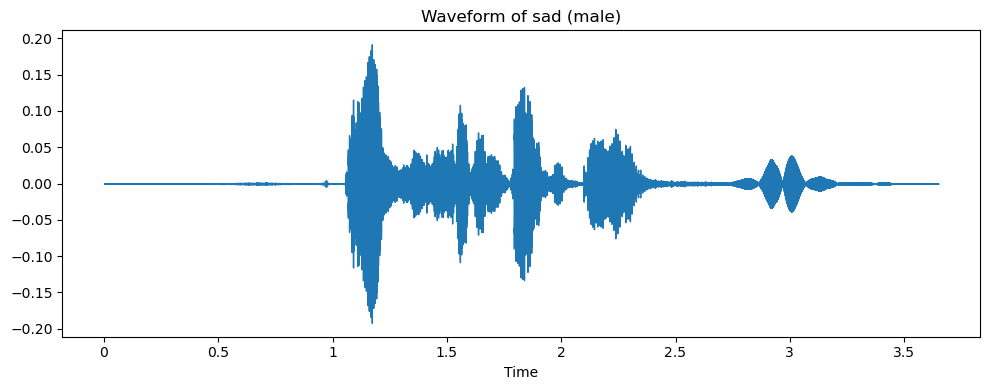

Processing file: Video_Speech_Actor_01/Actor_08/01-01-08-02-02-01-08.mp4 | Emotion: surprised | Gender: female


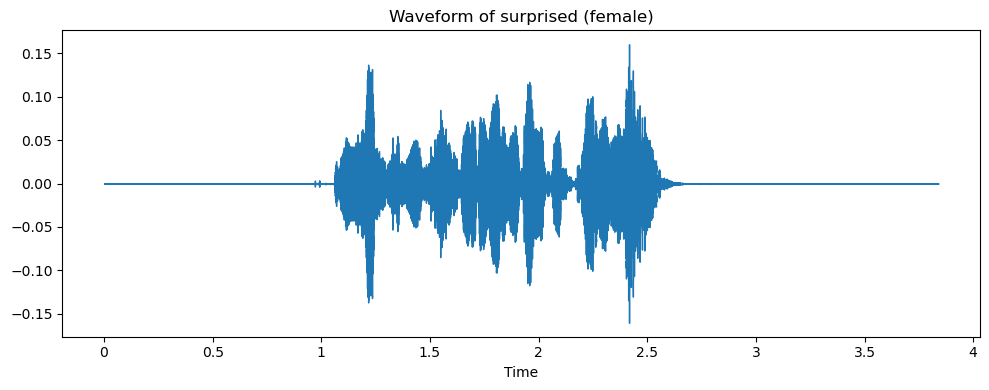

Processing file: Video_Speech_Actor_01/Actor_03/01-01-08-02-02-01-03.mp4 | Emotion: surprised | Gender: male


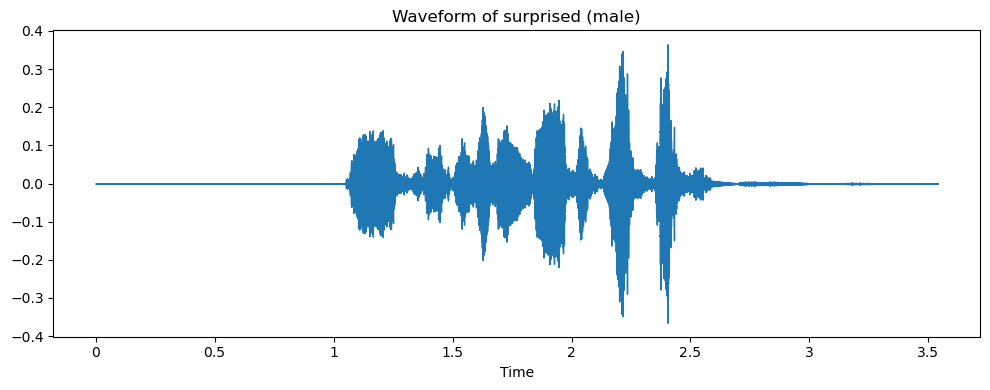

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Filter out video-only samples
filtered_df = df[df['Modality'] != 'video-only']

# Extract one random sample for each emotion and gender
samples = filtered_df.groupby(['Emotion', 'Gender']).apply(lambda x: x.sample(1)).reset_index(drop=True)
for i, row in samples.iterrows():
    file_path = row['File Path']
    emotion = row['Emotion']
    gender = row['Gender']
    print(f"Processing file: {file_path} | Emotion: {emotion} | Gender: {gender}")
    
    try:
        y, sr = load_audio_from_mp4(file_path)
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        continue

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform of {emotion} ({gender})')
    plt.tight_layout()
    plt.show()


In [24]:
import librosa

def remove_silence(y, sr, top_db=20):
    """
    Remove silence from an audio signal.
    
    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of `y`.
    top_db (int): The threshold (in decibels) below reference to consider as silence.
    
    Returns:
    numpy.ndarray: Audio time series with silence removed.
    """
    # Split the audio signal into non-silent intervals
    non_silent_intervals = librosa.effects.split(y, top_db=top_db)
    
    # Concatenate the non-silent intervals
    non_silent_audio = np.concatenate([y[start:end] for start, end in non_silent_intervals])
    
    return non_silent_audio

def preprocess_audio_files(df):
    """
    Preprocess all audio files in the dataframe by removing silence.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing audio file paths.
    
    Returns:
    pandas.DataFrame: DataFrame with preprocessed audio files.
    """
    preprocessed_data = []
    
    for i, row in df.iterrows():
        file_path = row['File Path']
        try:
            y, sr = load_audio_from_mp4(file_path)
            y = remove_silence(y, sr)
            
            # Skip files that are completely silent
            if len(y) == 0:
                continue
            
            # Update the row with the preprocessed audio
            row['Audio'] = y
            row['Sampling Rate'] = sr
            preprocessed_data.append(row)
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")
            continue
    
    return pd.DataFrame(preprocessed_data)

# Preprocess the audio files
preprocessed_df = preprocess_audio_files(filtered_df)
print(preprocessed_df)

                     File Name Modality Vocal Channel    Emotion Intensity  \
0     01-01-01-01-01-01-01.mp4  full-AV        speech    neutral    normal   
1     01-01-01-01-01-02-01.mp4  full-AV        speech    neutral    normal   
2     01-01-01-01-02-01-01.mp4  full-AV        speech    neutral    normal   
3     01-01-01-01-02-02-01.mp4  full-AV        speech    neutral    normal   
4     01-01-02-01-01-01-01.mp4  full-AV        speech       calm    normal   
...                        ...      ...           ...        ...       ...   
2695  01-01-08-02-02-01-24.mp4  full-AV        speech  surprised    strong   
2696  01-01-03-01-02-01-24.mp4  full-AV        speech      happy    normal   
2697  01-01-05-01-01-02-24.mp4  full-AV        speech      angry    normal   
2698  01-01-07-01-01-01-24.mp4  full-AV        speech    disgust    normal   
2699  01-01-08-02-02-02-24.mp4  full-AV        speech  surprised    strong   

         Statement     Repetition  Actor  Gender  \
0     State

In [35]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import pandas as pd

# Data Augmentation
# Define the augmentation pipeline
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.8, max_shift=0.8, p=0.8)  # min_offset and max_offset in samples
])

# Filter out neutral samples
neutral_samples = preprocessed_df[preprocessed_df['Emotion'] == 'neutral']

# Augment the neutral samples
augmented_data = []
for i, row in neutral_samples.iterrows():
    y = row['Audio']
    sr = row['Sampling Rate']
    
    # Apply augmentation
    augmented_audio = augment(samples=y, sample_rate=sr)
    
    # Create a new row with the augmented data
    new_row = row.copy()
    new_row['Audio'] = augmented_audio
    new_row['File Name'] = f"aug_{row['File Name']}"
    
    augmented_data.append(new_row)

# Append the augmented data to the original dataframe
augmented_df = pd.concat([preprocessed_df, pd.DataFrame(augmented_data)], ignore_index=True)
print(augmented_df)
augmented_df.to_csv('augmented_data.csv', index=True)
preprocessed_df = augmented_df.copy()
print(preprocessed_df.head())



/home/iiitd/anaconda3/lib/python3.12/site-packages/audiomentations/core/transforms_interface.py:108: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


                             File Name Modality Vocal Channel  Emotion  \
0             01-01-01-01-01-01-01.mp4  full-AV        speech  neutral   
1             01-01-01-01-01-02-01.mp4  full-AV        speech  neutral   
2             01-01-01-01-02-01-01.mp4  full-AV        speech  neutral   
3             01-01-01-01-02-02-01.mp4  full-AV        speech  neutral   
4             01-01-02-01-01-01-01.mp4  full-AV        speech     calm   
...                                ...      ...           ...      ...   
1651  aug_aug_01-01-01-01-02-02-23.mp4  full-AV        speech  neutral   
1652  aug_aug_01-01-01-01-01-01-24.mp4  full-AV        speech  neutral   
1653  aug_aug_01-01-01-01-01-02-24.mp4  full-AV        speech  neutral   
1654  aug_aug_01-01-01-01-02-01-24.mp4  full-AV        speech  neutral   
1655  aug_aug_01-01-01-01-02-02-24.mp4  full-AV        speech  neutral   

     Intensity     Statement     Repetition  Actor  Gender  \
0       normal  Statement 01  Repetition 01      

In [36]:
print(len(augmented_df))

1656


In [37]:
import librosa
import numpy as np

def extract_features(y, sr):
    """
    Extract audio features from an audio signal.
    
    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of `y`.
    
    Returns:
    dict: Dictionary containing extracted features.
    """
    features = {}
    
    # Extract features
    features['chroma_stft'] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features['rmse'] = np.mean(librosa.feature.rms(y=y))
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features['rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features['zero_crossing_rate'] = np.mean(librosa.feature.zero_crossing_rate(y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    for i in range(1, 21):
        features[f'mfcc_{i}'] = np.mean(mfccs[i-1])
    
    return features

# Extract features for each audio file in the dataframe
feature_list = []
for i, row in preprocessed_df.iterrows():
    y = row['Audio']
    sr = row['Sampling Rate']
    features = extract_features(y, sr)
    features['File Name'] = row['File Name']
    features['Emotion'] = row['Emotion']
    feature_list.append(features)

# Create a dataframe from the extracted features
features_df = pd.DataFrame(feature_list)
print(features_df)

# Save the extracted features to a CSV file
features_df.to_csv('extracted_features.csv', index=False)

   chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.451659  0.005970        1991.372151         2724.858844  3461.572266   
1     0.436611  0.006204        2146.639975         2908.164770  3900.676413   
2     0.415953  0.007191        2280.890705         2757.364387  4023.427734   
3     0.451833  0.006846        2514.118370         3025.911803  4456.938033   
4     0.419773  0.004147        2252.937690         2894.290139  3865.112965   

   zero_crossing_rate      mfcc_1      mfcc_2    mfcc_3     mfcc_4  ...  \
0            0.039157 -527.117996  168.277812 -5.277614  23.913459  ...   
1            0.040609 -524.823798  158.740156 -4.440534  28.272176  ...   
2            0.050902 -511.398241  159.441729 -3.896355  30.142680  ...   
3            0.057445 -505.955499  148.637058 -1.486240  34.765550  ...   
4            0.051674 -573.127583  158.877238 -1.873156  34.047614  ...   

    mfcc_13    mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfc

In [40]:
features_df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,File Name,Emotion
0,0.451659,0.005970,1991.372151,2724.858844,3461.572266,0.039157,-527.117996,168.277812,-5.277614,23.913459,...,2.248357,-12.094804,4.673728,-1.754826,-8.411727,1.750478,1.930589,-10.004006,01-01-01-01-01-01-01.mp4,neutral
1,0.436611,0.006204,2146.639975,2908.164770,3900.676413,0.040609,-524.823798,158.740156,-4.440534,28.272176,...,1.885538,-10.809573,3.833686,-4.416172,-9.240373,2.365308,1.009257,-9.965634,01-01-01-01-01-02-01.mp4,neutral
2,0.415953,0.007191,2280.890705,2757.364387,4023.427734,0.050902,-511.398241,159.441729,-3.896355,30.142680,...,0.574026,-10.258027,3.949755,-1.049620,-8.290076,-2.232571,3.033258,-9.578425,01-01-01-01-02-01-01.mp4,neutral
3,0.451833,0.006846,2514.118370,3025.911803,4456.938033,0.057445,-505.955499,148.637058,-1.486240,34.765550,...,0.966403,-7.758491,1.314945,-2.158972,-8.538513,-0.804759,2.943065,-8.189446,01-01-01-01-02-02-01.mp4,neutral
4,0.419773,0.004147,2252.937690,2894.290139,3865.112965,0.051674,-573.127583,158.877238,-1.873156,34.047614,...,2.494691,-9.323036,1.999530,-1.314901,-8.609114,1.861589,3.121983,-11.574371,01-01-02-01-01-01-01.mp4,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.406979,0.011431,8388.755017,5834.594848,15704.048192,0.272677,-353.607849,20.401060,9.391058,4.260514,...,-0.746210,-1.157709,-1.454399,-1.427384,-1.410874,-1.515860,-2.717837,-3.639532,aug_aug_01-01-01-01-02-02-23.mp4,neutral
1652,0.280644,0.004208,2405.345312,2788.747378,3971.816967,0.061435,-591.376038,129.691330,-6.763038,7.011156,...,-10.660856,-7.667157,-3.463110,-12.690640,-7.783996,-2.902358,-13.498565,-5.805528,aug_aug_01-01-01-01-01-01-24.mp4,neutral
1653,0.583720,0.007561,8381.940808,5162.594015,14702.141743,0.366778,-332.810822,42.016651,-32.586212,41.780048,...,-24.311171,18.526049,-17.766441,14.045596,-11.888205,11.604689,-7.628591,4.842336,aug_aug_01-01-01-01-01-02-24.mp4,neutral
1654,0.282270,0.002905,2390.191580,2669.349769,4069.282264,0.052600,-650.227112,108.601807,-16.130301,15.641207,...,-6.541208,-5.064343,-4.915673,-15.847090,-0.079619,-7.478890,-12.841878,-3.119822,aug_aug_01-01-01-01-02-01-24.mp4,neutral


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Define the feature columns (excluding the target column 'Emotion')
feature_columns = features_df.columns.difference(['Emotion', 'File Name'])
# Initialize the label encoder
le = LabelEncoder()

# Encode the target column 'Emotion'
features_df['Emotion'] = le.fit_transform(features_df['Emotion'])
# Create X and y
X = features_df[feature_columns]
y = features_df['Emotion']

# Split the dataset into training and testing sets with stratification on the 'Emotion' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train shape: (1324, 26)
X_test shape: (332, 26)
y_train shape: (1324,)
y_test shape: (332,)


In [42]:
print(y_train)

1450    5
1335    4
355     7
65      1
327     0
       ..
931     0
596     4
1404    5
524     2
1648    5
Name: Emotion, Length: 1324, dtype: int64


In [29]:
# import pandas as pd

# # Convert X_train to a DataFrame if it's not already one
# X_train = pd.DataFrame(X_train)

# # Plot feature importance with proper labels
# plt.figure(figsize=(10, 6))
# plt.title("Random Forest Feature Importances")
# plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.show()


In [30]:
# print(y_test_categorical)

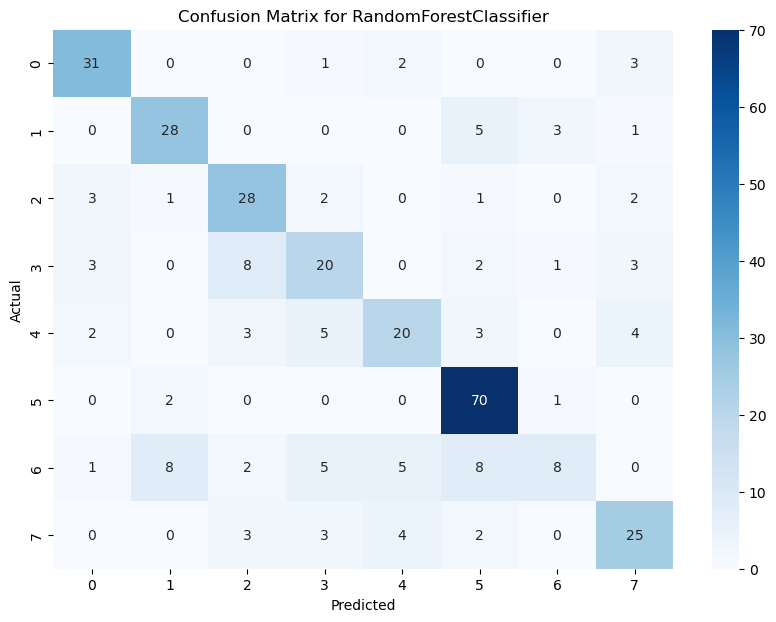

RandomForestClassifier ROC AUC: 0.9473761511519811
RandomForestClassifier F1 Score: 0.673186840129566
RandomForestClassifier Accuracy: 0.6927710843373494
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.72      0.76      0.74        37
           2       0.64      0.76      0.69        37
           3       0.56      0.54      0.55        37
           4       0.65      0.54      0.59        37
           5       0.77      0.96      0.85        73
           6       0.62      0.22      0.32        37
           7       0.66      0.68      0.67        37

    accuracy                           0.69       332
   macro avg       0.67      0.66      0.65       332
weighted avg       0.68      0.69      0.67       332

Epoch 1/50


/home/iiitd/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.2857 - loss: 1.8629
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.4441 - loss: 1.4940
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.5182 - loss: 1.2984
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.5828 - loss: 1.1516
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.6059 - loss: 1.0633
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.6259 - loss: 1.0105
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6663 - loss: 0.9587
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.6545 - loss: 0.9278
Epoch 9/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.7010 - loss: 0.8308
Epoch 10/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7367 - loss: 0.7802
Epoch 11/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7519 - loss: 0.7295
Epoch 12/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 

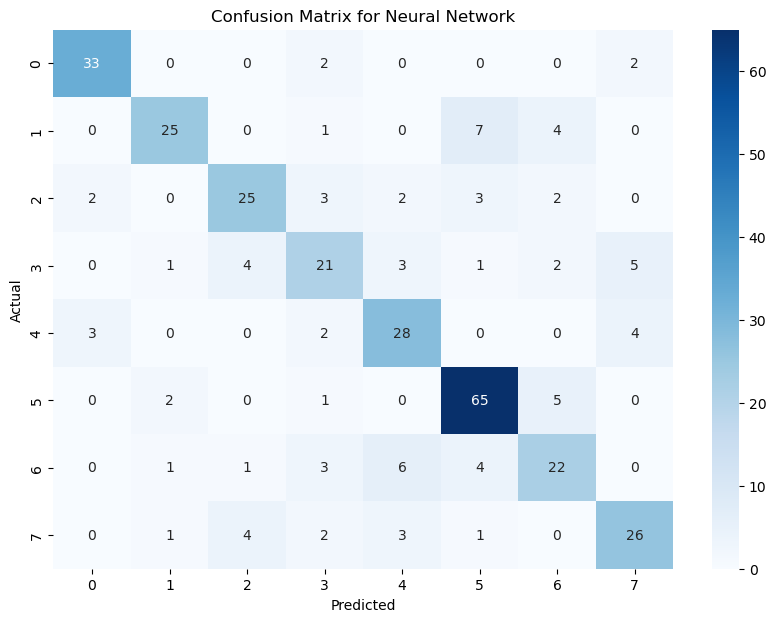

Neural Network ROC AUC: 0.9549508387620763
Neural Network F1 Score: 0.7357649020956728
Neural Network Accuracy: 0.7379518072289156


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize

# --- RandomForestClassifier Evaluation ---
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=300)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Confusion matrix for RandomForestClassifier
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for RandomForestClassifier
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr')
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f"RandomForestClassifier ROC AUC: {roc_auc_rf}")
print(f"RandomForestClassifier F1 Score: {f1_rf}")
print(f"RandomForestClassifier Accuracy: {accuracy_score(y_test, y_pred)}")
# --- Classification Report for RandomForestClassifier ---
report_rf = classification_report(y_test, y_pred)
print(f"Random Forest Classification Report:\n{report_rf}")
# --- Neural Network Evaluation ---
# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_categorical, epochs=50, batch_size=8, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Neural Network Accuracy: {accuracy}")

# Confusion matrix for Neural Network
y_pred_nn_probs = model.predict(X_test)  # Predict probabilities
y_pred_nn = np.argmax(y_pred_nn_probs, axis=1)  # Convert probabilities to class labels

cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for Neural Network
roc_auc_nn = roc_auc_score(y_test_categorical, y_pred_nn_probs, multi_class='ovr')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')
print(f"Neural Network ROC AUC: {roc_auc_nn}")
print(f"Neural Network F1 Score: {f1_nn}")
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn)}")



/home/iiitd/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 24, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,448 (615.03 KB)

 Trainable params: 157,448 (615.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1580 - loss: 2.0698 - val_accuracy: 0.2136 - val_loss: 1.9743
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2288 - loss: 1.9765 - val_accuracy: 0.2780 - val_loss: 1.8978
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2849 - loss: 1.8339 - val_accuracy: 0.3424 - val_loss: 1.7643
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 1.7621 - val_accuracy: 0.4203 - val_loss: 1.6507
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 1.7001 - val_accuracy: 0.3763 - val_loss: 1.6238
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 1.6441 - val_accuracy: 0.4102 - val_loss: 1.5070
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3865 - loss: 1.6065 - val_accuracy: 0.4373 - val_loss: 1.4547
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4463 - loss: 1.5127 - val_accuracy: 0.4644 - val_

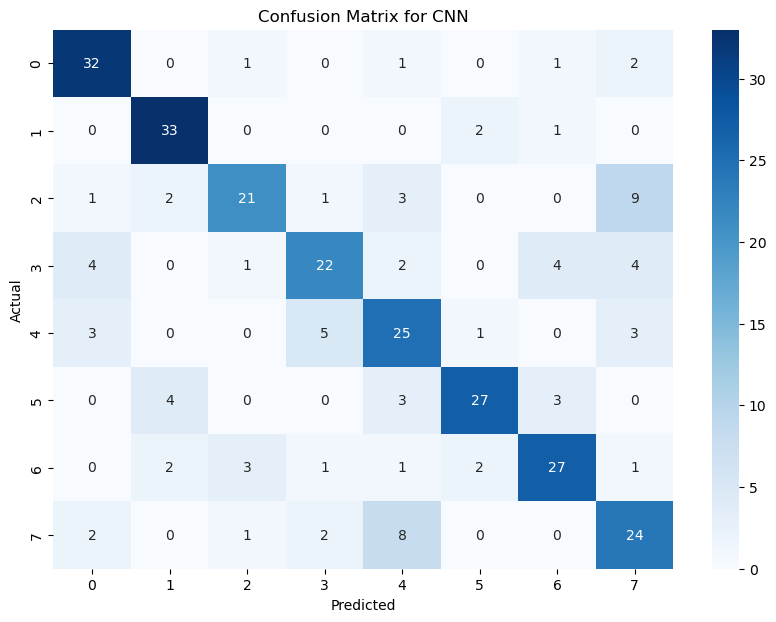

CNN ROC AUC: 0.942610280546327
CNN F1 Score: 0.7142563987283523
CNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.80      0.92      0.86        36
           2       0.78      0.57      0.66        37
           3       0.71      0.59      0.65        37
           4       0.58      0.68      0.62        37
           5       0.84      0.73      0.78        37
           6       0.75      0.73      0.74        37
           7       0.56      0.65      0.60        37

    accuracy                           0.72       295
   macro avg       0.72      0.72      0.71       295
weighted avg       0.72      0.72      0.71       295

CNN Accuracy: 0.7152542372881356


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
X_train = np.array(X_train)
X_test = np.array(X_test)
# Reshape the input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=50, batch_size=8, verbose=1, validation_data=(X_test_reshaped, y_test_categorical))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"CNN Model Accuracy: {accuracy}")

# Confusion matrix for CNN
y_pred_cnn_probs = model.predict(X_test_reshaped)  # Predict probabilities
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)  # Convert probabilities to class labels

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for CNN
roc_auc_cnn = roc_auc_score(y_test_categorical, y_pred_cnn_probs, multi_class='ovr')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
print(f"CNN ROC AUC: {roc_auc_cnn}")
print(f"CNN F1 Score: {f1_cnn}")

# Classification Report for CNN
report_cnn = classification_report(y_test, y_pred_cnn)
print(f"CNN Classification Report:\n{report_cnn}")
print(f"CNN Accuracy: {accuracy_score(y_test, y_pred_cnn)}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 26, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 13, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 6, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 3, 512)         │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 3, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,02

 Total params: 556,808 (2.12 MB)

 Trainable params: 554,120 (2.11 MB)

 Non-trainable params: 2,688 (10.50 KB)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1544 - loss: 2.4789 - val_accuracy: 0.1114 - val_loss: 2.1209
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2142 - loss: 2.2424 - val_accuracy: 0.1114 - val_loss: 2.1391
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2774 - loss: 1.9961 - val_accuracy: 0.1837 - val_loss: 2.0339
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2635 - loss: 1.9741 - val_accuracy: 0.2470 - val_loss: 1.8543
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2741 - loss: 1.8859 - val_accuracy: 0.2861 - val_loss: 1.7296
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3489 - loss: 1.7171 - val_accuracy: 0.3343 - val_loss: 1.6235
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3465 - loss: 1.7032 - val_accuracy: 0.3825 - val_loss: 1.4878
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3595 - loss: 1.6132 - val_accuracy: 0.4006 - v

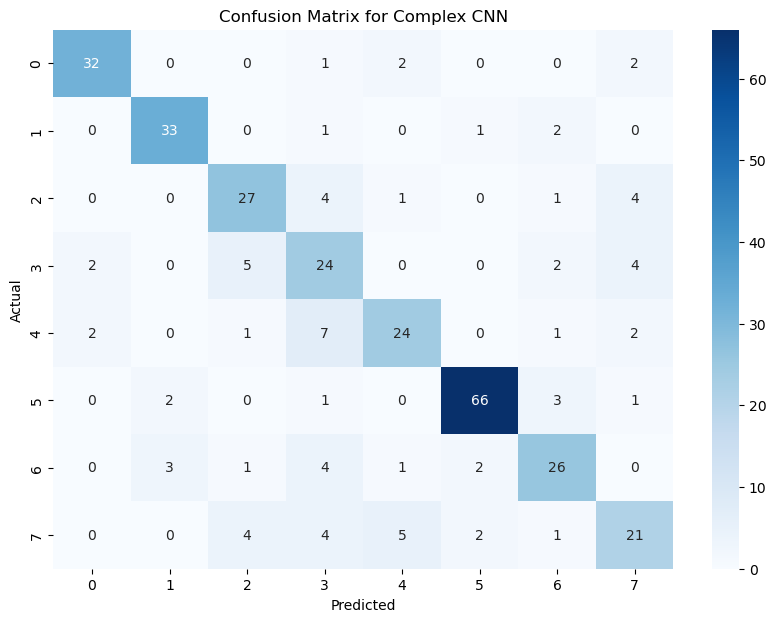

Complex CNN ROC AUC: 0.960503799597136
Complex CNN F1 Score: 0.7637576207564704
Complex CNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.87      0.89      0.88        37
           2       0.71      0.73      0.72        37
           3       0.52      0.65      0.58        37
           4       0.73      0.65      0.69        37
           5       0.93      0.90      0.92        73
           6       0.72      0.70      0.71        37
           7       0.62      0.57      0.59        37

    accuracy                           0.76       332
   macro avg       0.75      0.74      0.75       332
weighted avg       0.77      0.76      0.76       332

Complex CNN Accuracy: 0.7620481927710844


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the complex CNN model
model = Sequential()

# Add convolutional layers with batch normalization and dropout
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(X_train.shape[1], 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Adjust the last Conv1D layer to prevent negative dimension size
model.add(Conv1D(filters=512, kernel_size=2, padding='same'))  # Use smaller kernel size
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Reshape the input data to be 3D [samples, timesteps, features]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=100, batch_size=16, verbose=1, validation_data=(X_test_reshaped, y_test_categorical))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"Complex CNN Model Accuracy: {accuracy}")

# Confusion matrix for Complex CNN
y_pred_cnn_probs = model.predict(X_test_reshaped)  # Predict probabilities
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)  # Convert probabilities to class labels

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Complex CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC and F1 score for Complex CNN
roc_auc_cnn = roc_auc_score(y_test_categorical, y_pred_cnn_probs, multi_class='ovr')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
print(f"Complex CNN ROC AUC: {roc_auc_cnn}")
print(f"Complex CNN F1 Score: {f1_cnn}")

# Classification Report for Complex CNN
report_cnn = classification_report(y_test, y_pred_cnn)
print(f"Complex CNN Classification Report:\n{report_cnn}")
print(f"Complex CNN Accuracy: {accuracy_score(y_test, y_pred_cnn)}")
